In [153]:
#TFM ALEJANDRO FERNÁNDEZ MORÁN - PREDICIÓN DE POPULARIDAD DE CANCIONES DE SPOTIFY

In [154]:
# Abrir los archivos .csv como un DataFrame
# Importar pandas y numpy para usarlos como pd y np respectivamente
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from pandas.plotting import scatter_matrix
import scikitplot as skplt

In [155]:
url=('C:/Users/Admin/BIG DATA/TFM/basesdedatos/tracks.csv')
data=pd.read_csv(url,sep=',')
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [156]:
data.tail()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.518,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.663,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.314,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.615,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4
586671,5Ocn6dZ3BJFPWh4ylwFXtn,Mar de Emociones,38,214360,0,['Afrosound'],['0i4Qda0k4nf7jnNHmSNpYv'],2015-07-01,0.686,0.723,6,-7.067,1,0.0363,0.105,0.000000,0.2640,0.9750,112.204,4


## 1) Pre-Procesado

In [157]:
# muestra la informacion que contiene nuestro dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 non-null  float64
 16  liveness          58

In [158]:
#Limpìeza : Busqueda de valores vacios
data.isnull().any()

id                  False
name                 True
popularity          False
duration_ms         False
explicit            False
artists             False
id_artists          False
release_date        False
danceability        False
energy              False
key                 False
loudness            False
mode                False
speechiness         False
acousticness        False
instrumentalness    False
liveness            False
valence             False
tempo               False
time_signature      False
dtype: bool

In [159]:
#limpieza : Suma de valores vacios
data.isnull().sum()

id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64

In [160]:
data.duplicated().sum()


0

In [161]:
nan_rows = data[data.isnull().any(1)]
print(nan_rows)

                            id name  popularity  duration_ms  explicit  \
226336  4iH7negBYMfj2z0wDNmgdx  NaN          28       264973         0   
510975  04d5kbLvSAIBt3pGcljdhC  NaN           0       184293         0   
510976  05tRkgyxVdwMePGqOXMDYU  NaN           0       191587         0   
510978  0YAMRgAQH6tkTh4sWNXr8L  NaN           0       191573         0   
510979  1K6MQQxmFpPb66ZnaiIpHX  NaN           0       167602         0   
...                        ...  ...         ...          ...       ...   
517206  6OH9mz9aFbGlbf74cBwYWD  NaN           2       209760         0   
517215  15RqFDA86slfzujSQMEX4i  NaN           2       257280         0   
520127  0hKA9A2JPtFdg0fiMhyjQD  NaN           6       194081         0   
525238  1kR4gIb7nGxHPI3D2ifs59  NaN          26       289440         0   
525265  4xyBq8t4nkUKH8s28j6ZoD  NaN          24       254000         0   

       artists                  id_artists release_date  danceability  energy  \
226336    ['']  ['0LyfQWJT6nXa

In [162]:
data.drop(data[data.name.isnull()].index, inplace = True)

In [163]:
data.isnull().sum()

id                  0
name                0
popularity          0
duration_ms         0
explicit            0
artists             0
id_artists          0
release_date        0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
dtype: int64

In [164]:
#Hay ciertas columnas que no necesitamops ya que no aportan información relevante para este proyecto
data.drop(columns=['id_artists','id','time_signature'], inplace=True)

In [165]:
data.shape

(586601, 17)

In [166]:
data['release_date'] = pd.to_datetime(data['release_date'])

In [167]:
data.describe()


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
count,586601.000000,5.866010e+05,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000,586601.000000
mean,27.573212,2.300549e+05,0.044091,0.563612,0.542071,5.221594,-10.205789,0.658797,0.104870,0.449803,0.113425,0.213933,0.552306,118.467930
std,18.369417,1.265328e+05,0.205298,0.166101,0.251910,3.519420,5.089422,0.474114,0.179902,0.348812,0.266843,0.184328,0.257673,29.762942
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750830e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.606000
50%,27.000000,2.149070e+05,0.000000,0.577000,0.549000,5.000000,-9.242000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.387000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.481000,1.000000,0.076300,0.784000,0.009550,0.278000,0.769000,136.324000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000


## 2) EDA

### Popularity

La popularidad de las canciones. El valor estará entre 0 y 100, siendo 100 el más popular. 

La popularidad se calcula a partir de la popularidad de las pistas individuales del álbum.

El desarrollo de este proyecto se va a enfocar en la popularidad de las canciones a partir de las caracteristicas de estas.

La popularidad se calcula mediante un algoritmo y se basa, en su mayor parte, en el número total de reproducciones que ha tenido la pista y lo recientes que son esas reproducciones. 


In [168]:
#Vamos a crear una nueva columna de año para facilitar las visualizaciones
data['year'] = data.apply(lambda row: row.release_date.year, axis = 1)

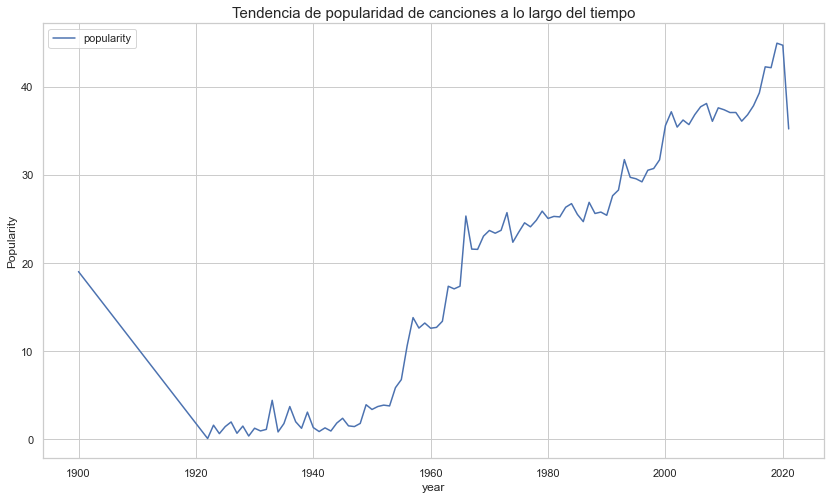

In [169]:
años = data[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness", "year","popularity"]].\
groupby("year").mean().sort_values(by="year").reset_index()

# year_avg.head()
plt.figure(figsize=(14,8))
plt.title("Tendencia de popularidad de canciones a lo largo del tiempo", fontdict={"fontsize": 15})

lines = ["popularity"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=años)
    
    
plt.ylabel("Popularity")
plt.legend(lines)

### Explicit

Los contenidos explícitos suelen llevar la etiqueta Parental Advisory (abreviada PAL), que es una etiqueta de advertencia.

Se coloca en las grabaciones de audio en reconocimiento de blasfemias o referencias inapropiadas, con la intención de alertar a los padres sobre el material potencialmente inadecuado para los niños.

La etiqueta se ha incluido en las listas digitales que ofrecen las tiendas de música en línea (como Spotify).

Los valores de la caracteristica 'Explicit' van entre 0 si no es explicito y 1 en el caso de que lo sea 

La correlación lineal con la popularidad es de 0.2117


In [170]:
data['explicit'].corr(data['popularity'])

0.21174871687732763

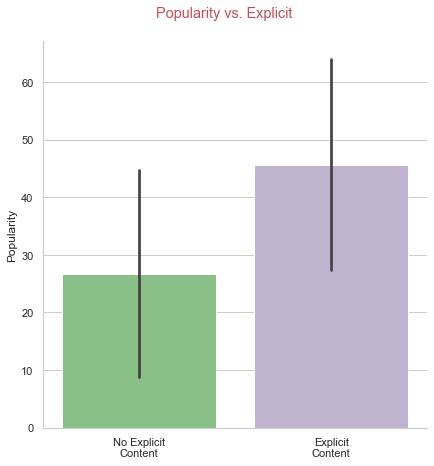

In [171]:
exp_data = sns.catplot(data=data, kind="bar",
                        x="explicit", y="popularity",
                        ci="sd", palette='Accent',
                        height=6)
exp_data.fig.suptitle('Popularity vs. Explicit', y=1.05, c='r')
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['No Explicit\nContent', 'Explicit\nContent'])
plt.show()

### Key

In [172]:
data['key'].corr(data['popularity'])

0.015306411718133558

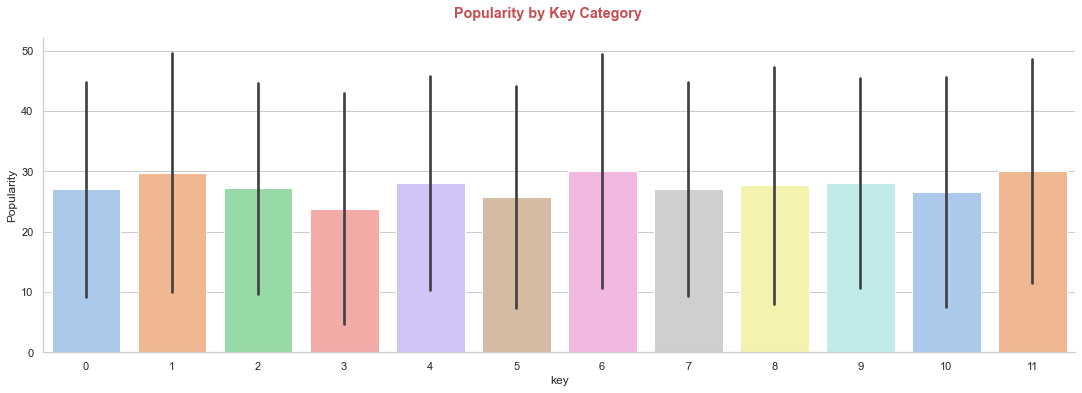

In [173]:
exp_data = sns.catplot(data=data, kind="bar",
                        x="key", y="popularity",
                        palette='pastel',
                        ci = 'sd',
                        height=5, aspect = 3)
exp_data.fig.suptitle('Popularity by Key Category', y=1.05, c='r', weight='bold')
exp_data.set_axis_labels("key", "Popularity")
plt.show()

### Mode

El modo indica la modalidad (mayor o menor) de una pista, el tipo de escala del que se deriva su contenido melódico.

El mayor se representa con 1 y el menor con 0.

In [174]:
data['mode'].corr(data['popularity'])

-0.033652145849338774

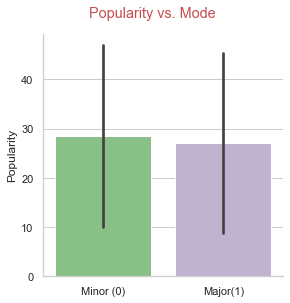

In [175]:
exp_data = sns.catplot(data=data, kind="bar",
                        x="mode", y="popularity",
                        ci="sd", palette='Accent',
                        height=4)
exp_data.fig.suptitle('Popularity vs. Mode', y=1.05, c='r')
exp_data.set_axis_labels("", "Popularity")
exp_data.set_xticklabels(['Minor (0)', 'Major(1)'])
plt.show()

### Acousticness

Una medida de confianza de 0,0 a 1,0 sobre si la pista es acústica. 1,0 representa una alta confianza en que la pista es acústica.

La acústica de la mayoría de las pistas es cercana a 0 o 1

Cuanto más se confíe en que un tema es acústico, menor será su popularidad media (se aplica para acousitcness > 0,1)

In [176]:
data['acousticness'].corr(data['popularity'])

-0.37072305222327456

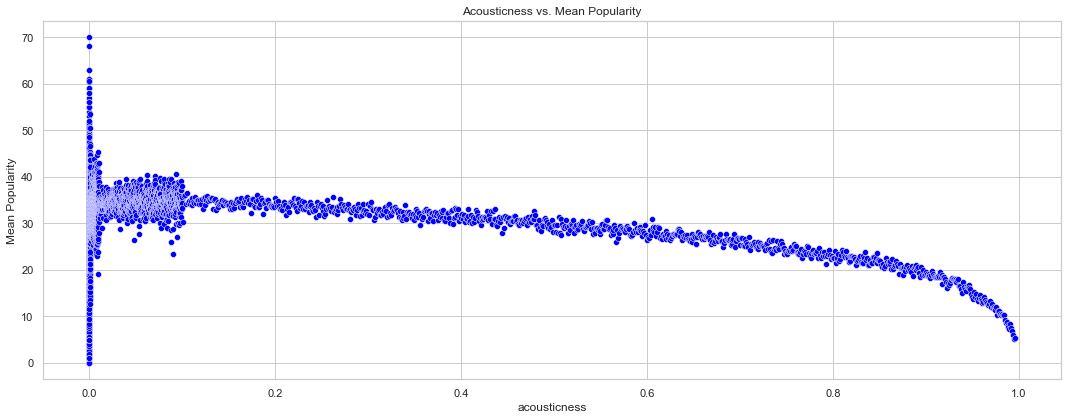

In [177]:
fig, ax = plt.subplots(figsize=(15, 6))
ax1_data =  data.groupby('acousticness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x = ax1_data['acousticness'], y = ax1_data['popularity'], color='blue', ax=ax)
ax.set_title('Acousticness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Danceability

La bailabilidad describe la idoneidad de una pista para el baile basándose en una combinación de elementos musicales como el tempo, la estabilidad del ritmo, la fuerza del compás y la regularidad general. Un valor de 0,0 es el menos bailable y 1,0 el más bailable.

In [178]:
data['danceability'].corr(data['popularity'])

0.1868779568060133

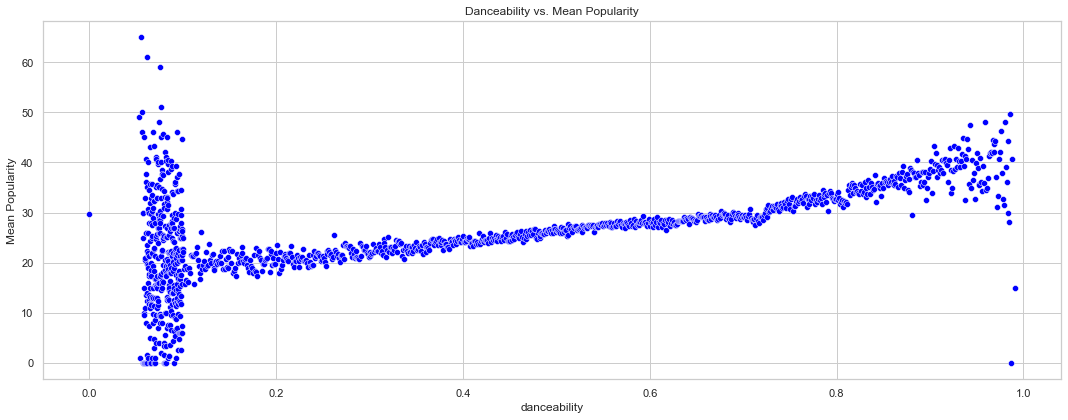

In [179]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('danceability')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='danceability', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('Danceability vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Energy

La energía es una medida de 0,0 a 1,0 y representa una medida perceptiva de intensidad y actividad. Por lo general, las pistas energéticas se sienten rápidas, ruidosas y con mucho ruido. Por ejemplo, el death metal tiene mucha energía, mientras que un preludio de Bach tiene una puntuación baja en la escala. 

Entre las características perceptivas que contribuyen a este atributo se encuentran el rango dinámico, el volumen percibido, el timbre, la velocidad de aparición y la entropía general.



In [180]:
data['energy'].corr(data['popularity'])

0.30217823075423195

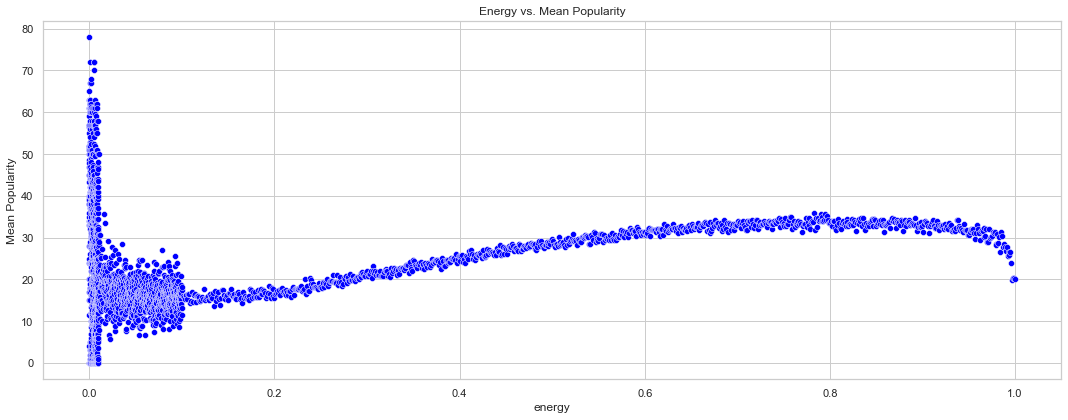

In [181]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('energy')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='energy', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('Energy vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Instrumentalness

Predice si una pista no contiene voces. Los sonidos "Ooh" y "aah" se consideran instrumentales en este contexto. 
Las pistas de rap o de palabras habladas son claramente "vocales". 

Cuanto más se acerque el valor de instrumentalización a 1,0, mayor será la probabilidad de que la pista no tenga contenido vocal. 
Los valores superiores a 0,5 representan pistas instrumentales, pero la confianza es mayor a medida que el valor se acerca a 1,0



In [182]:
data['instrumentalness'].corr(data['popularity'])

-0.2364029422456204

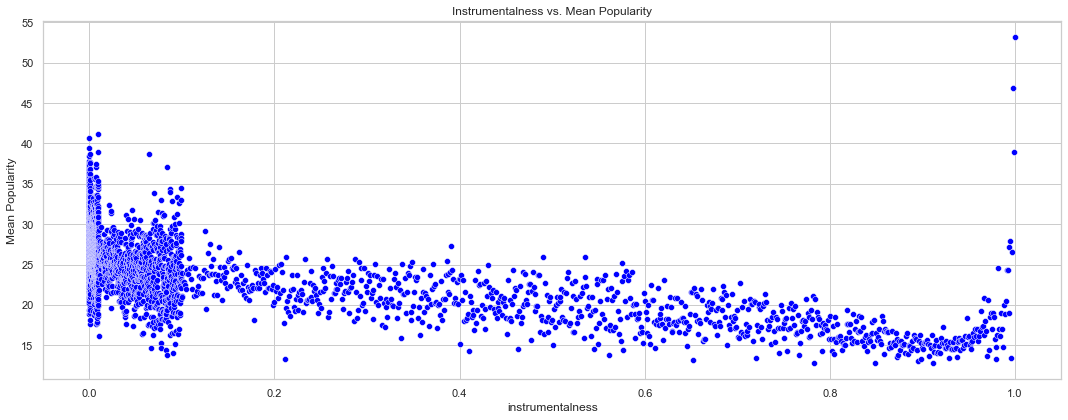

In [183]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('instrumentalness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='instrumentalness', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('Instrumentalness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Liveness

Detecta la presencia de público en la grabación. Los valores más altos de liveness representan una mayor probabilidad de que la pista haya sido interpretada en directo.

Un valor superior a 0,8 proporciona una fuerte probabilidad de que la pista sea en directo

In [184]:
data['liveness'].corr(data['popularity'])

-0.04873549287006477

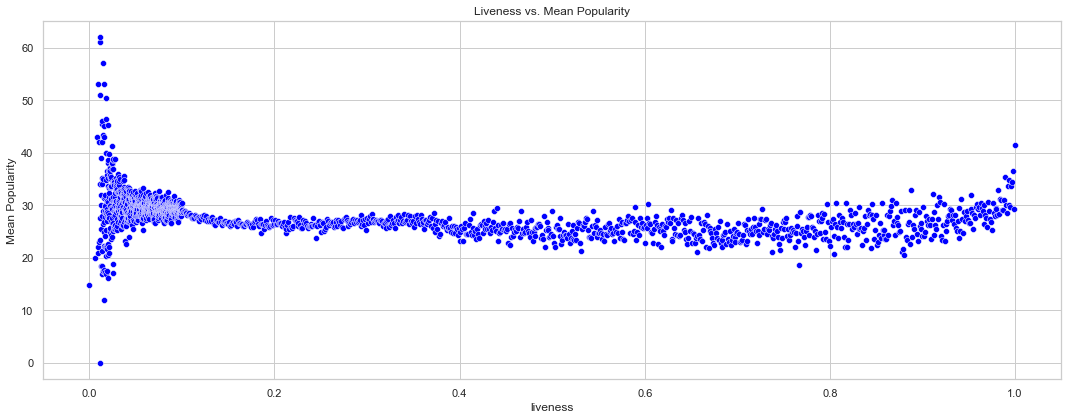

In [185]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('liveness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='liveness', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('Liveness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Loudness

La sonoridad general de una pista en decibelios (dB). Los valores de sonoridad se promedian en toda la pista y son útiles para comparar la sonoridad relativa de las pistas.

La sonoridad es la cualidad de un sonido que es el principal correlato psicológico de la fuerza física (amplitud). Los valores suelen oscilar entre -60 y 0 db.

In [186]:
data['loudness'].corr(data['popularity'])

0.3270012327057041

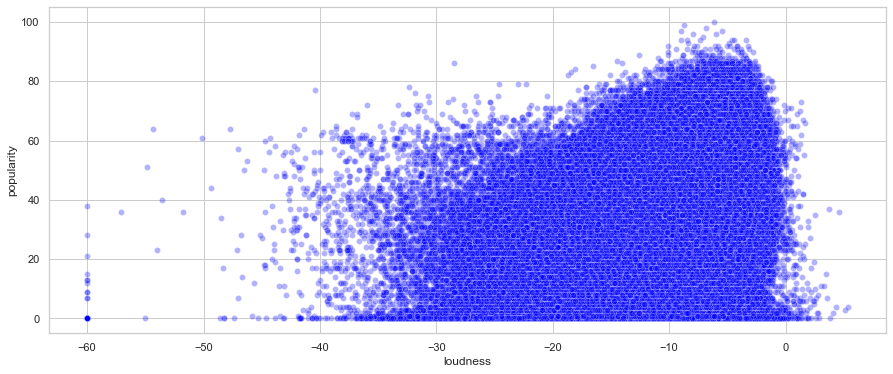

In [187]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='loudness', y='popularity', data=data, color='blue', alpha=0.3)
plt.show()

### Speechiness

La expresividad detecta la presencia de palabras habladas en una pista. Cuanto más exclusivamente hablada sea la grabación (por ejemplo, un programa de entrevistas, un audiolibro o una poesía), más se acercará a 1,0 el valor del atributo.

Los valores superiores a 0,66 describen pistas que probablemente estén compuestas exclusivamente por palabras habladas. 

Los valores entre 0,33 y 0,66 describen pistas que pueden contener tanto música como voz, ya sea en secciones o en capas, incluyendo casos como la música rap. Los valores inferiores a 0,33 representan probablemente música y otras pistas no habladas.

In [188]:
data['speechiness'].corr(data['popularity'])

-0.04741501720075195

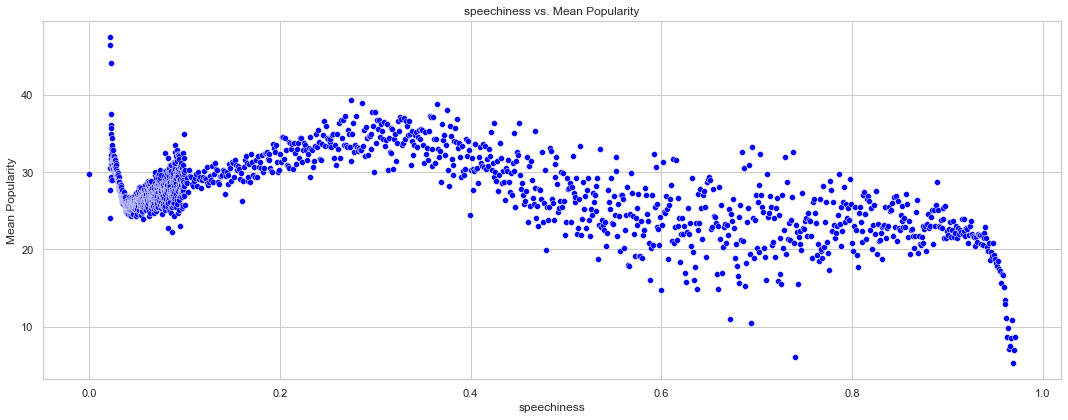

In [189]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('speechiness')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='speechiness', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('speechiness vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Tempo

El tempo global estimado de una pista en pulsaciones por minuto (BPM). 

En la terminología musical, el tempo es la velocidad o el ritmo de una pieza determinada y se deriva directamente de la duración media de los tiempos.

In [190]:
data['tempo'].corr(data['popularity'])

0.07122322946223328

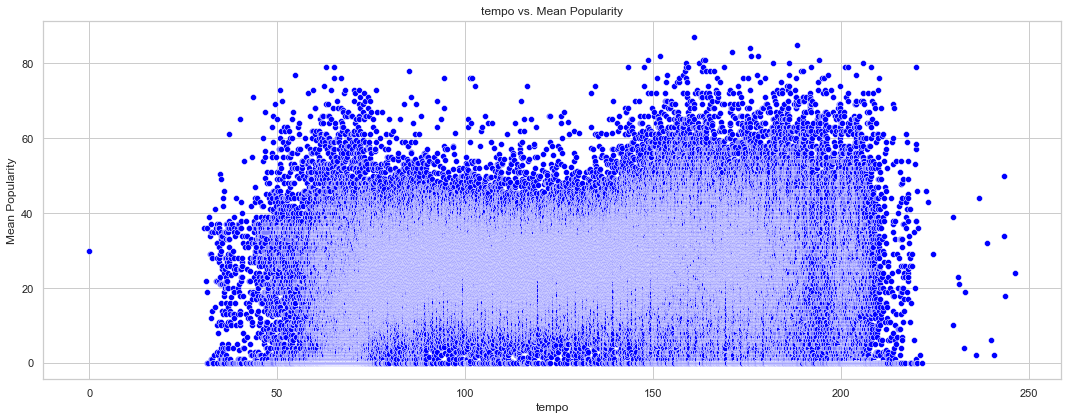

In [191]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('tempo')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='tempo', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('tempo vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

### Valence

Una medida de 0,0 a 1,0 que describe la positividad musical que transmite una pista. 

Las pistas con alta valencia suenan más positivas (por ejemplo, felices, alegres, eufóricas), mientras que las pistas con baja valencia suenan más negativas (por ejemplo, tristes, deprimidas, enfadadas).

In [192]:
data['valence'].corr(data['popularity'])

0.004558253772741698

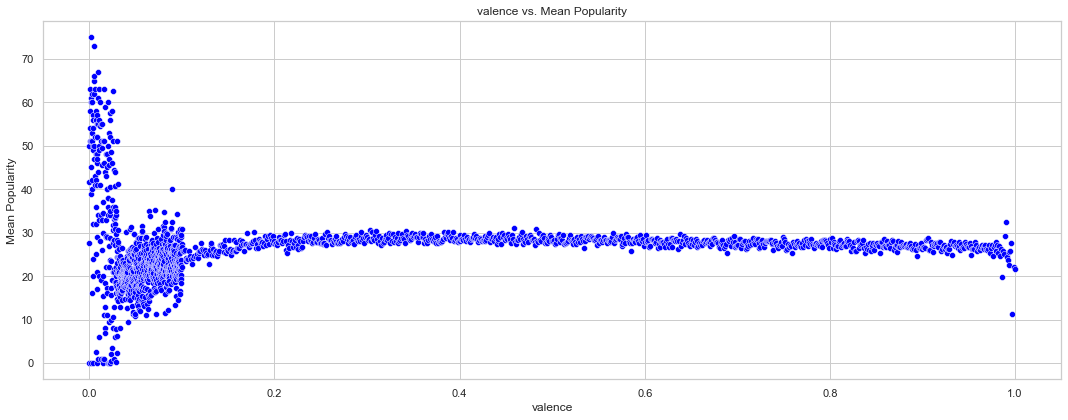

In [193]:
fig, ax = plt.subplots(1, figsize=(15, 6), sharey=True, sharex = True)
ax_data =  data.groupby('valence')['popularity'].mean().to_frame().reset_index()
ax = sns.scatterplot(x='valence', y='popularity', data=ax_data, color='blue', ax=ax)
ax.set_title('valence vs. Mean Popularity')
ax.set_ylabel('Mean Popularity', fontsize=12)
plt.tight_layout()
plt.show()

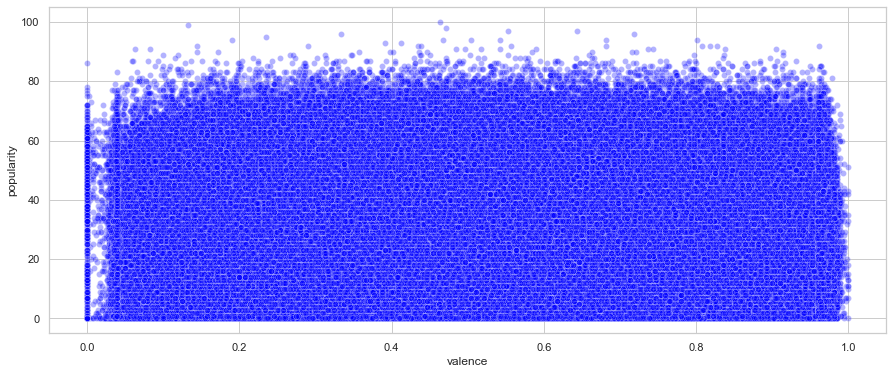

In [194]:
fig, ax = plt.subplots(figsize = (15, 6))
sns.scatterplot(x='valence', y='popularity', data=data, color='blue', alpha=0.3)
plt.show()

## 3) Visualización 

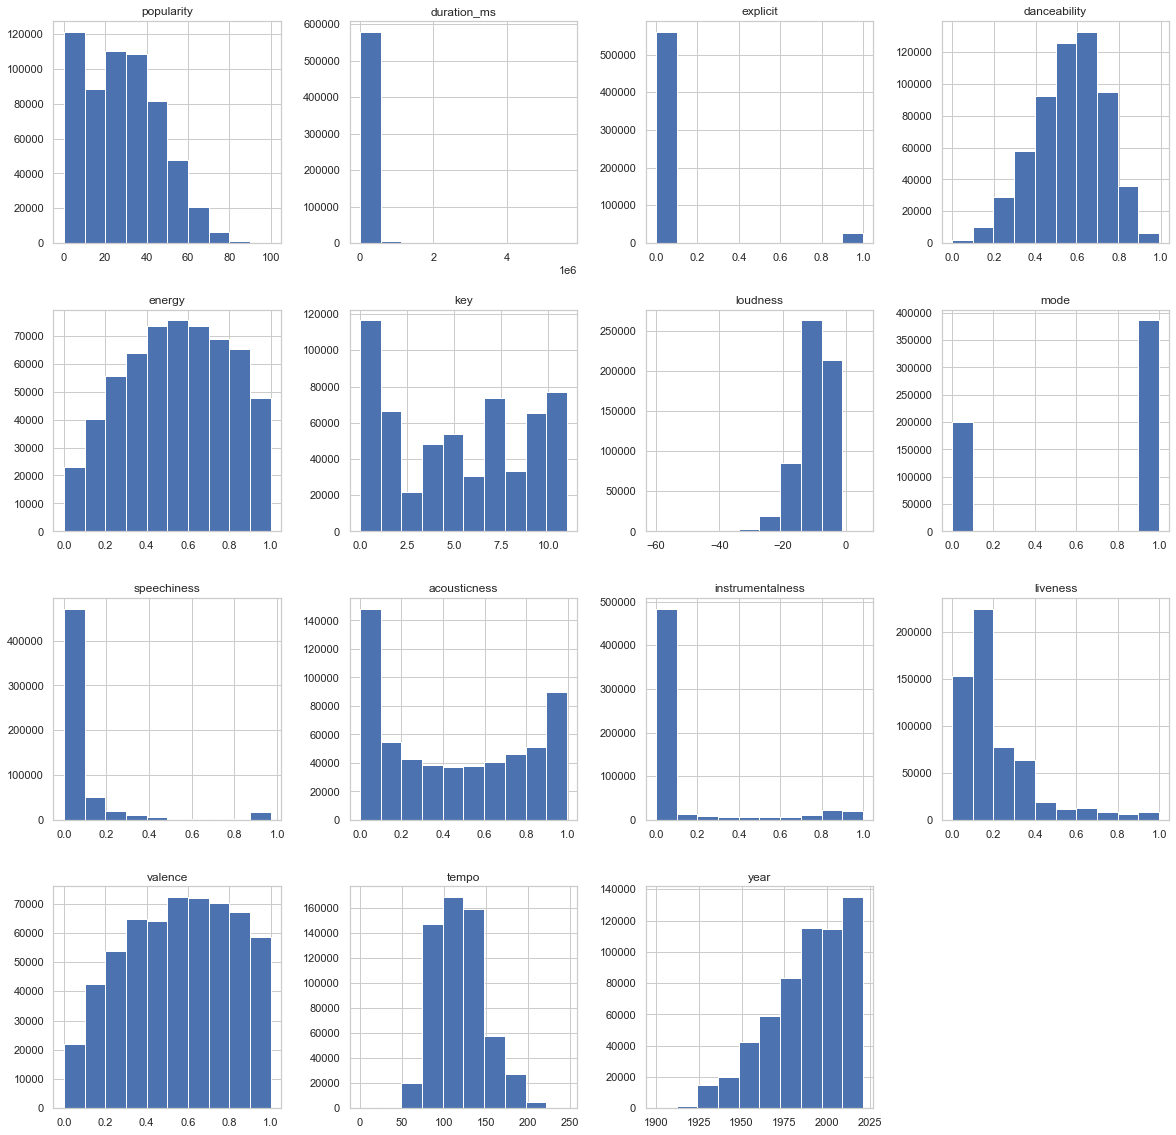

In [195]:
#Histogramas
data.hist(figsize=(20, 20))
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Admin\anaconda3\lib\si

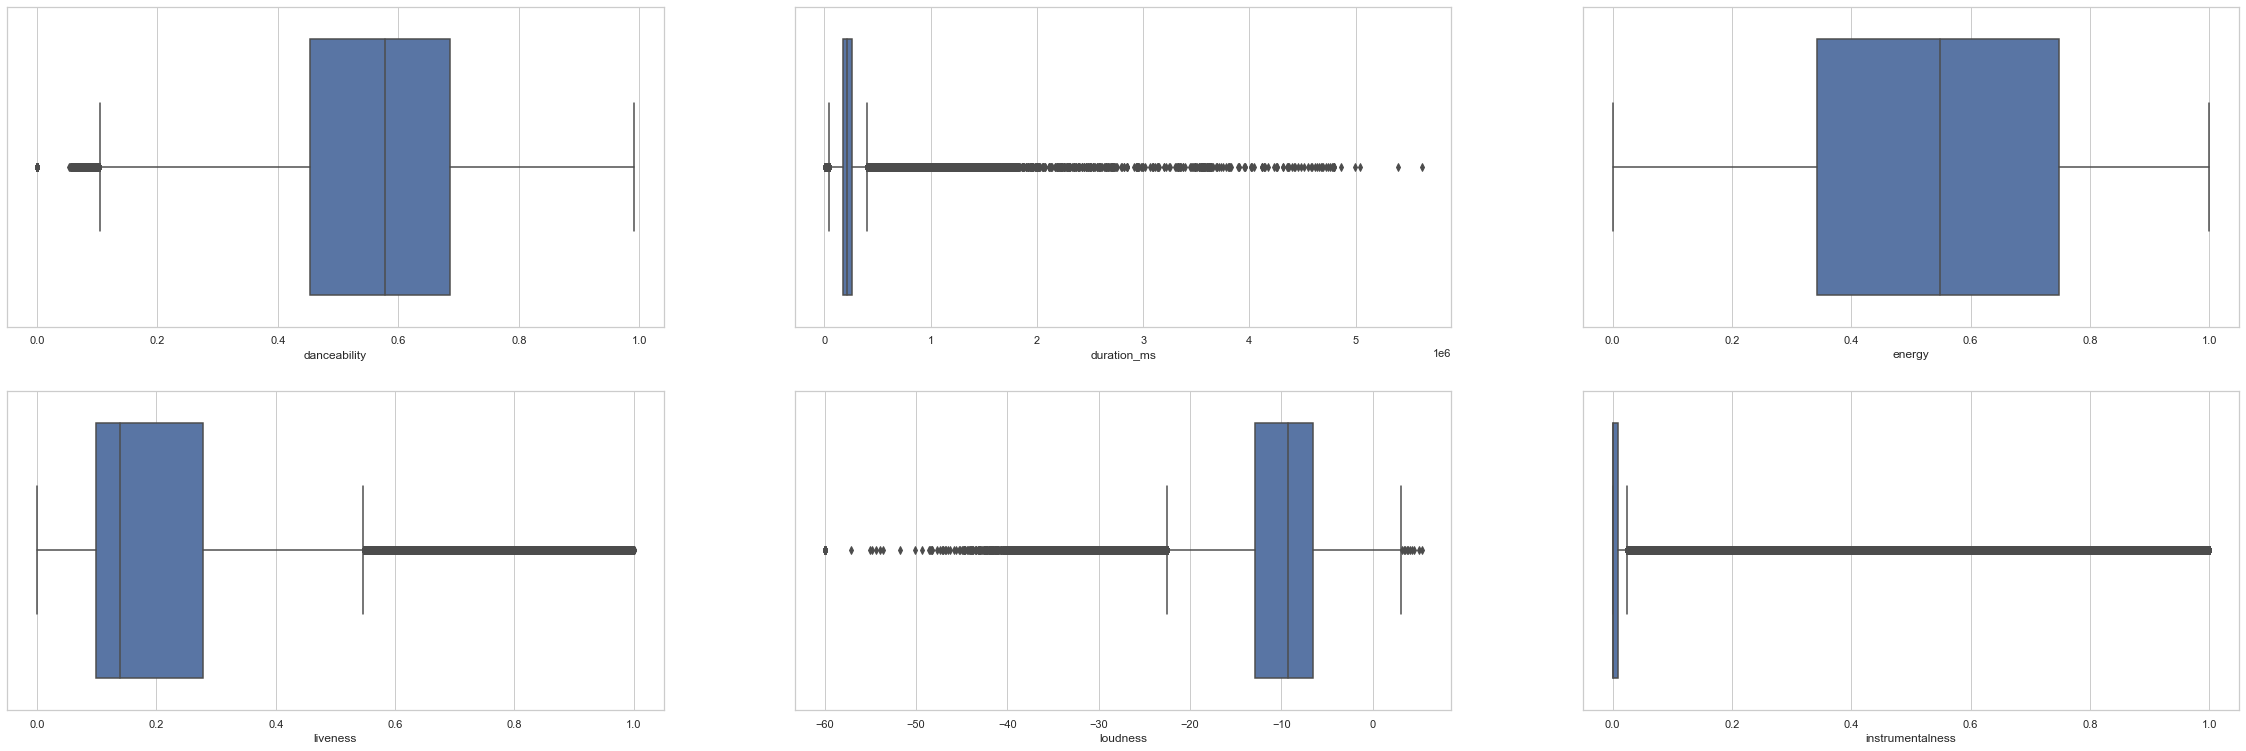

In [196]:
plt.figure(figsize = (40, 20))
plt.subplot(331)
sns.boxplot(data['danceability'])
plt.subplot(332)
sns.boxplot(data['duration_ms'])
plt.subplot(333)
sns.boxplot(data['energy'])
plt.subplot(334)
sns.boxplot(data['liveness'])
plt.subplot(335)
sns.boxplot(data['loudness'])
plt.subplot(336)
sns.boxplot(data['instrumentalness'])
plt.show()

<AxesSubplot:>

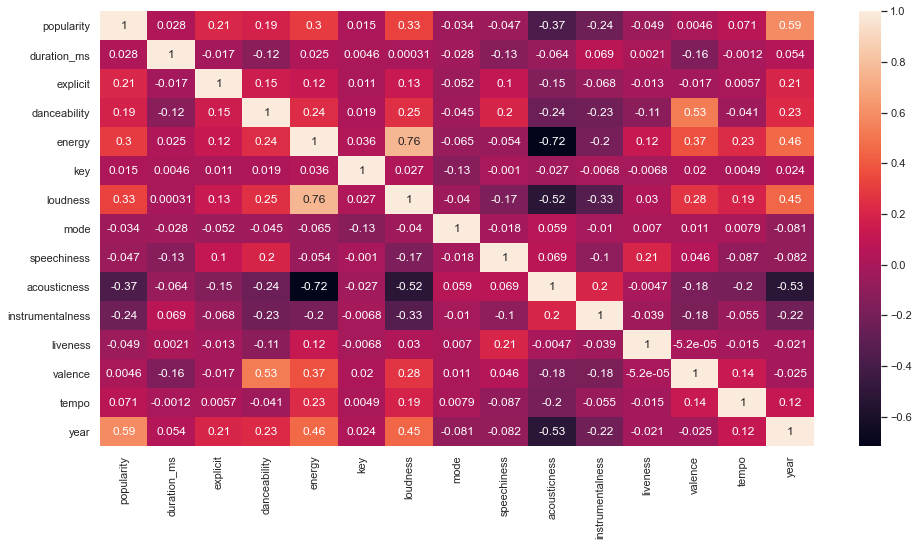

In [197]:
plt.figure(figsize=(16, 8))
sns.set(style="whitegrid")
corr = data.corr()
sns.heatmap(corr,annot=True)

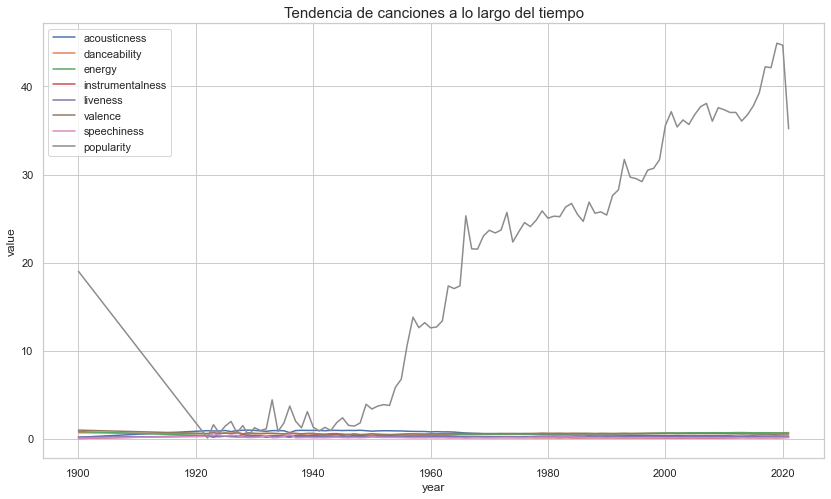

In [198]:
años = data[["acousticness","danceability","energy", "instrumentalness", 
               "liveness","tempo", "valence", "loudness", "speechiness","popularity", "year"]].\
groupby("year").mean().sort_values(by="year").reset_index()

# year_avg.head()
plt.figure(figsize=(14,8))
plt.title("Tendencia de canciones a lo largo del tiempo", fontdict={"fontsize": 15})

lines = ["acousticness","danceability","energy", 
         "instrumentalness", "liveness", "valence", "speechiness","popularity"]

for line in lines:
    ax = sns.lineplot(x='year', y=line, data=años)
    
    
plt.ylabel("value")
plt.legend(lines)

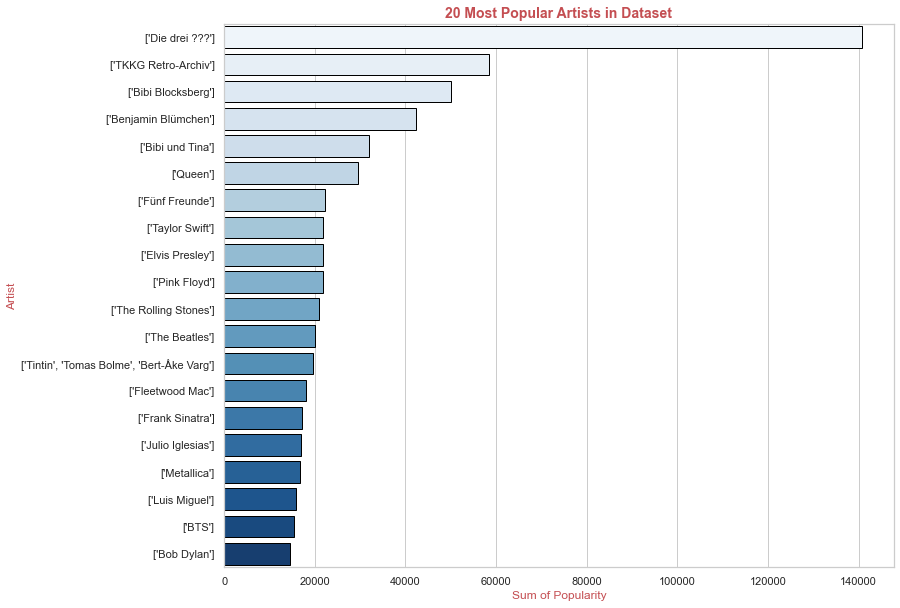

In [199]:
# # Plotting
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = data.groupby('artists')['popularity'].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Sum of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset', c='r', fontsize=14, weight = 'bold')
plt.show()

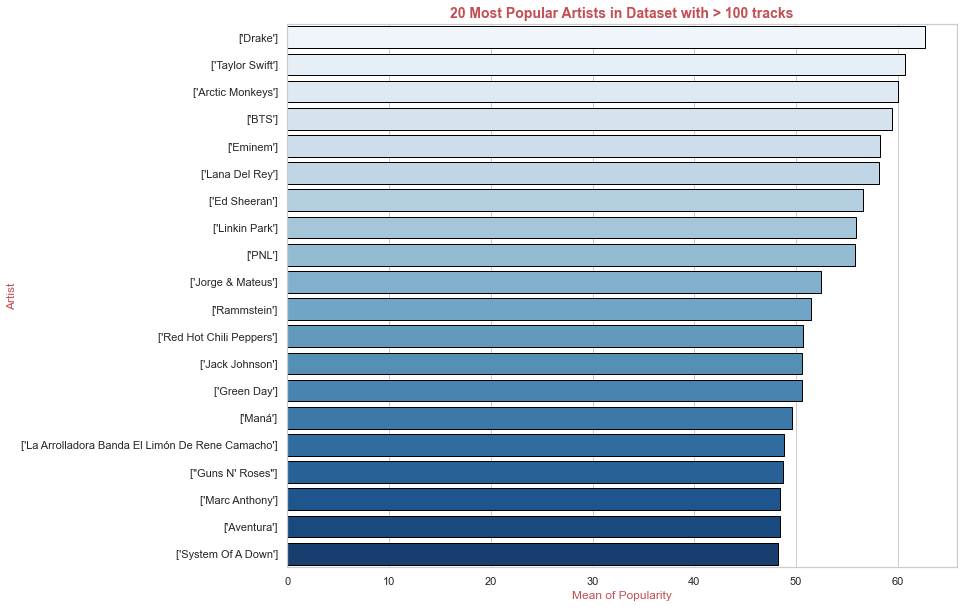

In [200]:
# find out artists with more than 100 tracks
data['popular_artist'] = data['artists'].map(data['artists'].value_counts()>100)
pop_arts  = data.groupby(['artists', 'popular_artist'])['popularity'].mean().sort_values(ascending=False).reset_index(1)
df_pop_arts = pop_arts.loc[pop_arts['popular_artist'] == True,['popularity']]

# # Plotting
fig, ax = plt.subplots(figsize = (12, 10))
lead_artists = df_pop_arts.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(20)
ax = sns.barplot(x=lead_artists.values, y=lead_artists.index, palette="Blues", orient="h", edgecolor='black', ax=ax)
ax.set_xlabel('Mean of Popularity', c='r', fontsize=12)
ax.set_ylabel('Artist', c='r', fontsize=12)
ax.set_title('20 Most Popular Artists in Dataset with > 100 tracks', c='r', fontsize=14, weight = 'bold')
plt.show()

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'drivers license'),
  Text(1, 0, 'Blinding Lights'),
  Text(2, 0, 'Friday (feat. Mufasa & Hypeman) - Dopamine Re-Edit'),
  Text(3, 0, 'LA NOCHE DE ANOCHE'),
  Text(4, 0, 'Good Days'),
  Text(5, 0, 'Ella No Es Tuya - Remix'),
  Text(6, 0, 'Paradise (feat. Dermot Kennedy)'),
  Text(7, 0, "Hecha Pa' Mi"),
  Text(8, 0, 'Wellerman - Sea Shanty / 220 KID x Billen Ted Remix'),
  Text(9, 0, 'Goosebumps - Remix'),
  Text(10, 0, 'you broke me first'),
  Text(11, 0, 'What’s Next'),
  Text(12, 0, 'DÁKITI'),
  Text(13, 0, 'ROCKSTAR (feat. Roddy Ricch)'),
  Text(14, 0, 'Best Friend (feat. Doja Cat)'),
  Text(15, 0, 'Baila Conmigo (with Rauw Alejandro)'),
  Text(16, 0, 'Beautiful Mistakes (feat. Megan Thee Stallion)'),
  Text(17, 0, 'WAP (feat. Megan Thee Stallion)'),
  Text(18, 0, 'Therefore I Am'),
  Text(19, 0, 'Wants and Needs (feat. Lil Baby)')])

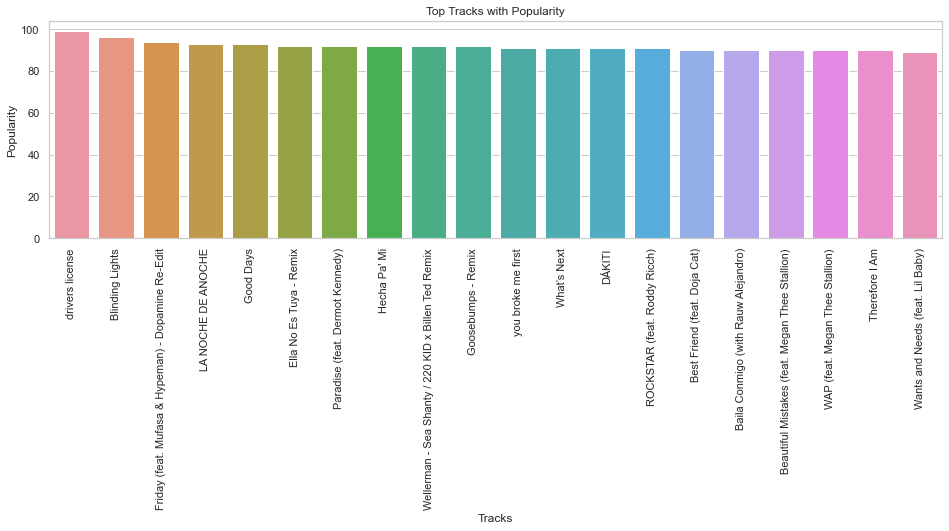

In [201]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = data.groupby("name")["popularity"].mean().sort_values(ascending=False).head(20)
axis = sns.barplot(x.index, x)
axis.set_title('Top Tracks with Popularity')
axis.set_ylabel('Popularity')
axis.set_xlabel('Tracks')
plt.xticks(rotation = 90)


C:\Users\Admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, "['Die drei ???']"),
  Text(1, 0, "['TKKG Retro-Archiv']"),
  Text(2, 0, "['Bibi Blocksberg']"),
  Text(3, 0, "['Benjamin Blümchen']"),
  Text(4, 0, "['Bibi und Tina']"),
  Text(5, 0, "['Queen']"),
  Text(6, 0, "['Fünf Freunde']"),
  Text(7, 0, "['Taylor Swift']"),
  Text(8, 0, "['Elvis Presley']"),
  Text(9, 0, "['Pink Floyd']"),
  Text(10, 0, "['The Rolling Stones']"),
  Text(11, 0, "['The Beatles']"),
  Text(12, 0, "['Tintin', 'Tomas Bolme', 'Bert-Åke Varg']"),
  Text(13, 0, "['Fleetwood Mac']"),
  Text(14, 0, "['Frank Sinatra']"),
  Text(15, 0, "['Julio Iglesias']"),
  Text(16, 0, "['Metallica']"),
  Text(17, 0, "['Luis Miguel']"),
  Text(18, 0, "['BTS']"),
  Text(19, 0, "['Bob Dylan']")])

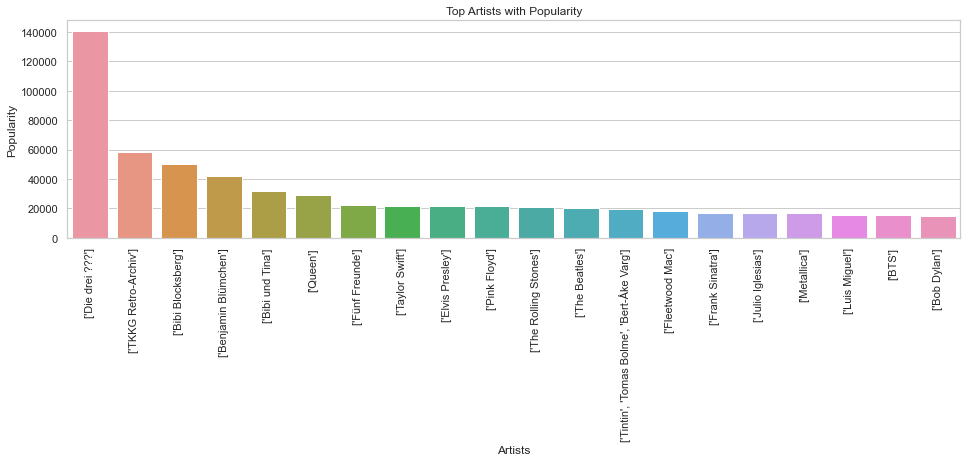

In [202]:
plt.figure(figsize=(16, 4))
sns.set(style="whitegrid")
x = data.groupby("artists")["popularity"].sum().sort_values(ascending=False).head(20)
ax = sns.barplot(x.index, x)
ax.set_title('Top Artists with Popularity')
ax.set_ylabel('Popularity')
ax.set_xlabel('Artists')
plt.xticks(rotation = 90)

### 3) Modelado 

In [203]:
data.value_counts('popularity')

popularity
0      44631
35     12231
23     12139
1      12024
36     11879
       ...  
96         2
98         1
99         1
95         1
100        1
Length: 101, dtype: int64

In [204]:
#mean_df = data['popularity'].mean()->27.5732124561666967


In [205]:
data.loc[data['popularity'] < 30, 'popularity'] = 0 
data.loc[data['popularity'] >= 30, 'popularity'] = 1
data.loc[data['popularity'] == 1]


,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,year,popular_artist
149,Nobody Knows You When You're Down and Out,1,177133,0,['Bessie Smith'],1923-01-01,0.614,0.0423,4,-12.033,1,0.0535,0.996,0.002930,0.1830,0.2110,89.822,1923,False
150,Weather Bird,1,161933,0,"['Louis Armstrong', 'Earl Hines']",1923-01-01,0.831,0.2620,8,-12.386,1,0.0942,0.984,0.912000,0.2040,0.9010,104.606,1923,False
151,'Tain't Nobody's Bizness If I Do,1,206600,0,['Bessie Smith'],1923-01-01,0.537,0.0443,3,-16.474,0,0.0343,0.996,0.000265,0.1520,0.1370,80.468,1923,False
1128,"On the Sunny Side of the Street (From ""Is Ever...",1,194320,0,['Tommy Dorsey'],1925-01-01,0.678,0.1750,3,-13.021,1,0.0301,0.969,0.001050,0.1770,0.5800,112.941,1925,False
1129,Marie,1,197787,0,"['Tommy Dorsey', 'Jack Leonard', 'Bunny Berigan']",1925-01-01,0.531,0.1700,5,-14.500,1,0.0771,0.991,0.174000,0.1260,0.8050,165.165,1925,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,云与海,1,258267,0,['阿YueYue'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,2020,False
586668,blind,1,153293,0,['ROLE MODEL'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,2020,False
586669,What They'll Say About Us,1,187601,0,['FINNEAS'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,2020,False
586670,A Day At A Time,1,142003,0,"['Gentle Bones', 'Clara Benin']",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,2021,False


In [206]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC


from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

features = ["acousticness","danceability","duration_ms","energy","explicit","instrumentalness"
            ,'key','liveness','loudness','mode','speechiness','tempo','valence','year']
training = data.sample(frac = 0.8,random_state = 420)
X_train = training[features]
y_train = training['popularity']
X_test = data.drop(training.index)[features]

In [207]:
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size = 0.2, random_state = 420)

In [208]:
RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_valid)
RFC_Accuracy = accuracy_score(y_valid, RFC_Predict)
print("Accuracy: " + str(RFC_Accuracy))

RFC_AUC = roc_auc_score(y_valid, RFC_Predict) 
print("AUC: " + str(RFC_AUC))

Accuracy: 0.7630757428854534
AUC: 0.7593769676134731


In [214]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_valid,RFC_Predict))

              precision    recall  f1-score   support

           0       0.77      0.80      0.79     51172
           1       0.75      0.72      0.73     42685

    accuracy                           0.76     93857
   macro avg       0.76      0.76      0.76     93857
weighted avg       0.76      0.76      0.76     93857



In [215]:
matrix=confusion_matrix(y_valid,RFC_Predict)
print(matrix)

[[40952 10220]
 [12017 30668]]


In [209]:
LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_valid)
LR_Accuracy = accuracy_score(y_valid, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))

LR_AUC = roc_auc_score(y_valid, LR_Predict) 
print("AUC: " + str(LR_AUC))

Accuracy: 0.6421151325953312
AUC: 0.63856051633602


In [210]:
# AdaBoost Algorithm
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
model = AdaBoostClassifier()
# n_estimators = 50 (default value) 
# base_estimator = DecisionTreeClassifier (default value)
model.fit(X_train,y_train)
preds = model.predict(X_valid)
prediccion=accuracy_score(y_valid, preds)

print("Accuracy: " + str(prediccion))
ADA_AUC = roc_auc_score(y_valid, preds) 
print("AUC: " + str(ADA_AUC))

Accuracy: 0.7213207326038548
AUC: 0.7188756372921633


In [211]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
preds = model.predict(X_valid)
prediccion=accuracy_score(y_valid, preds)

print("Accuracy: " + str(prediccion))
XG_AUC = roc_auc_score(y_valid, preds) 
print("AUC: " + str(XG_AUC))

C:\Users\Admin\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:26:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 0.7565445305091788
AUC: 0.753060982215615


In [212]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_valid,preds))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78     51172
           1       0.74      0.71      0.73     42685

    accuracy                           0.76     93857
   macro avg       0.75      0.75      0.75     93857
weighted avg       0.76      0.76      0.76     93857



In [213]:
matrix=confusion_matrix(y_valid,preds)
print(matrix)

[[40507 10665]
 [12185 30500]]
